# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```.

## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | object       |
| id_cliente              |  Código de identificação do cliente                 | int64        |
| sexo                    |  Sexo do cliente                                    | object       |
| posse_de_veiculo        |  Indica se o cliente possui veículo                 | bool         |
| posse_de_imovel         |  Indica se o cliente possui imóvel                  | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                    | int64        |
| tipo_renda              |  Tipo de renda do cliente                           | object       |
| educacao                |  Grau de instrução do cliente                       | object       |
| estado_civil            |  Estado civil do cliente                            | object       |
| tipo_residencia         |  Tipo de residência do cliente                      | object       |
| idade                   |  Idade do cliente                                   | int64        |
| tempo_emprego           |  Tempo no emprego atual                             | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | float64      |
| renda                   |  Renda em reais                                     | float64      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [7]:
#!pip install ydata_profiling

In [8]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [10]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda = renda.drop(['Unnamed: 0', 'id_cliente'], axis=1)
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [12]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


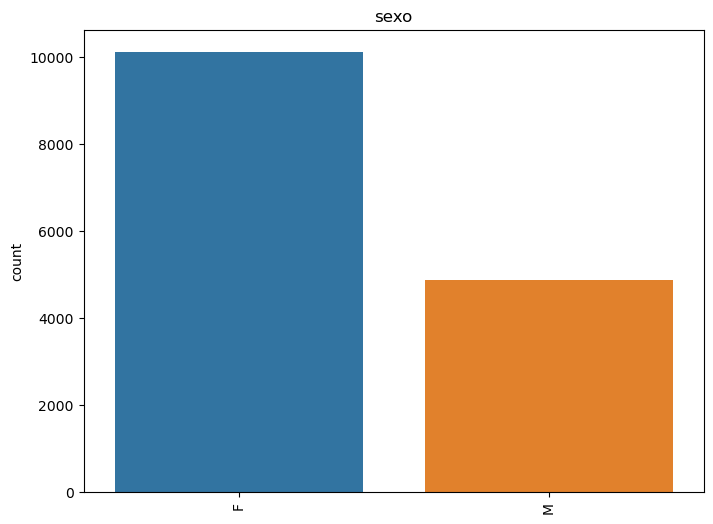

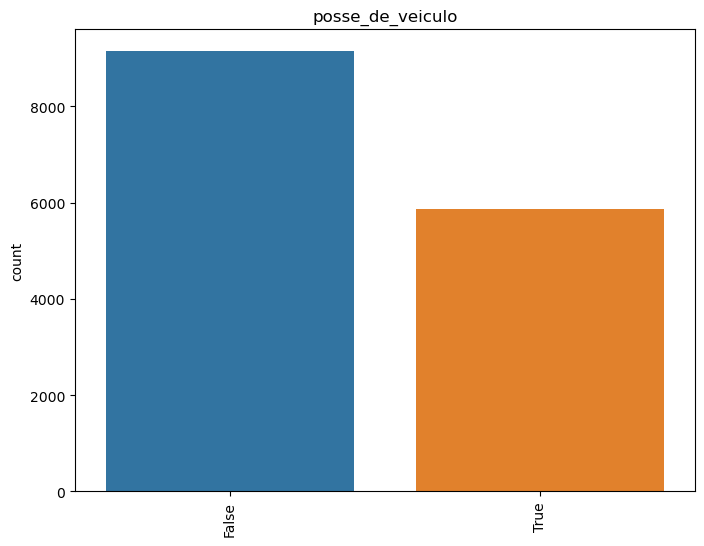

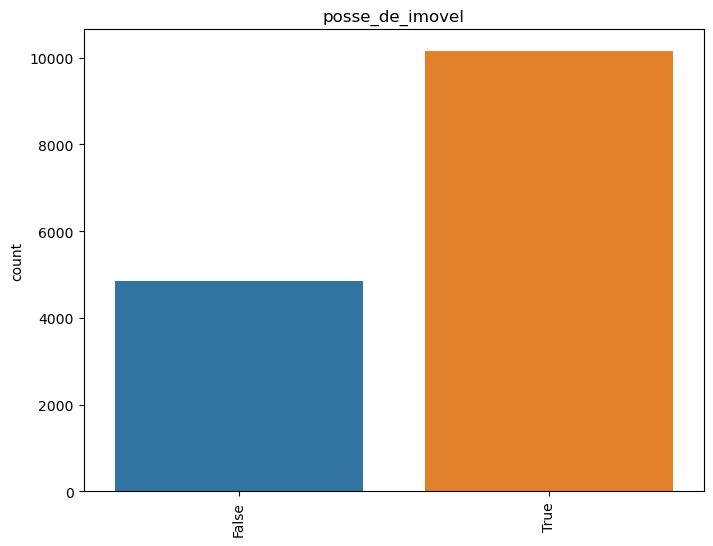

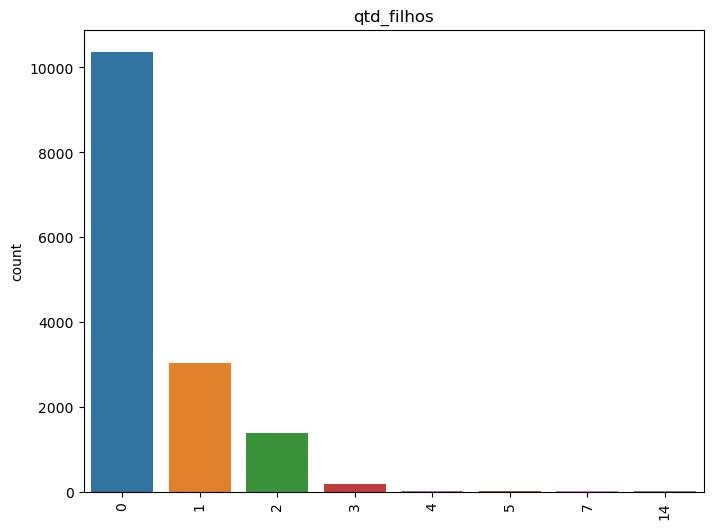

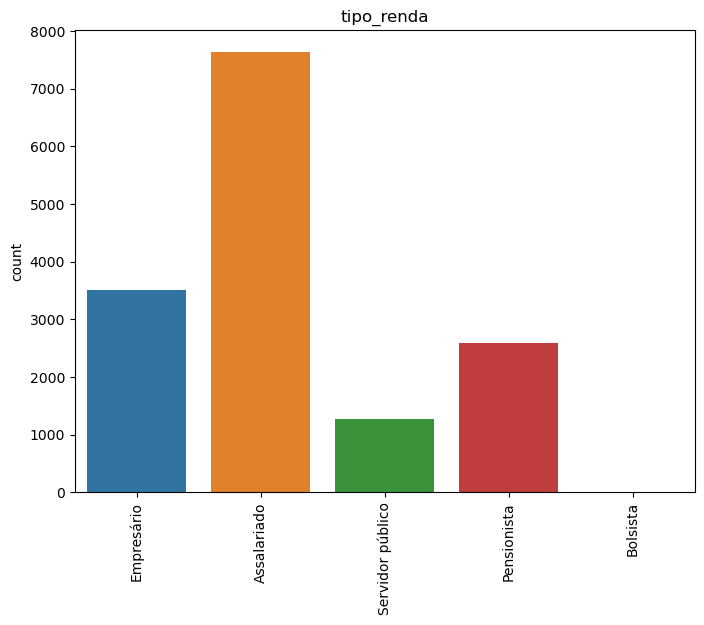

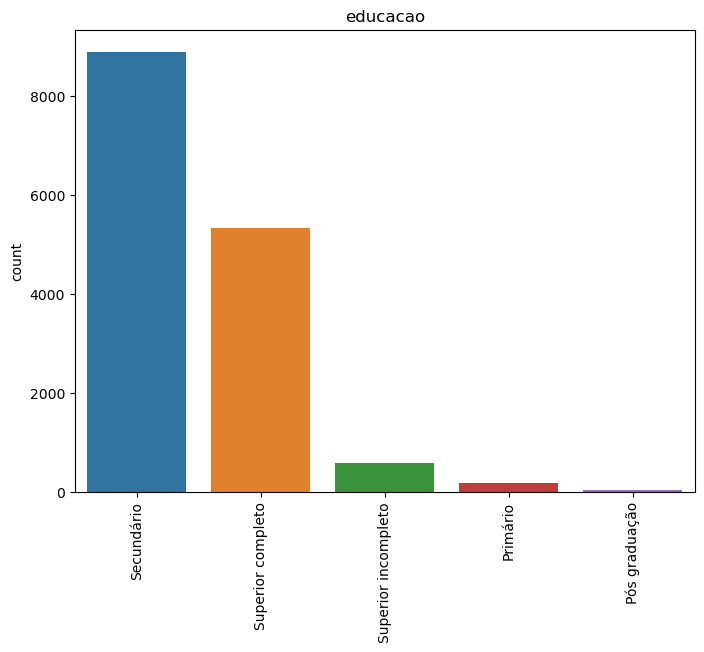

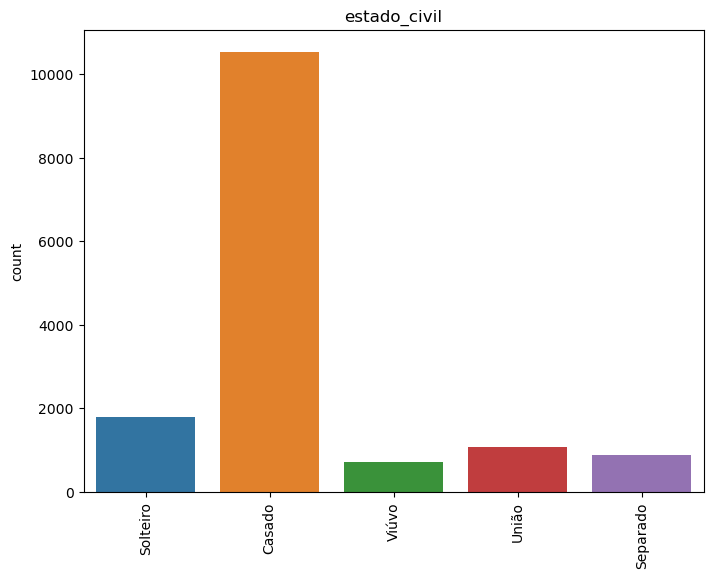

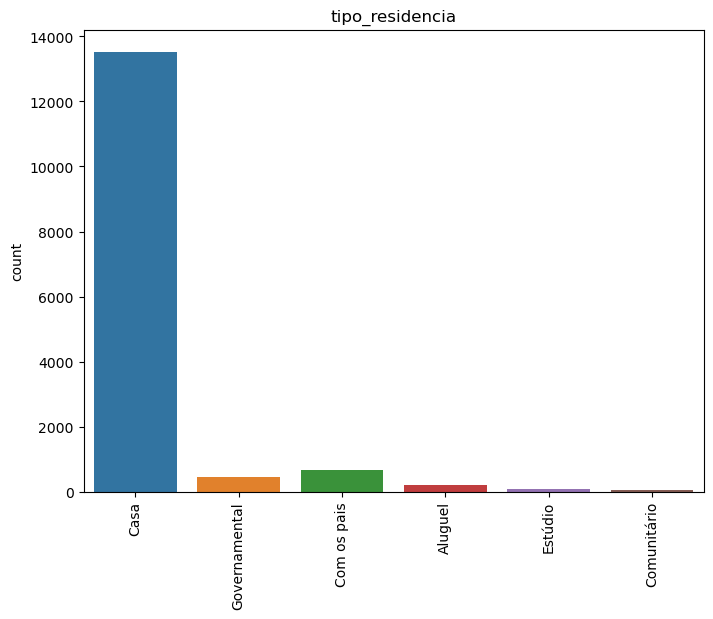

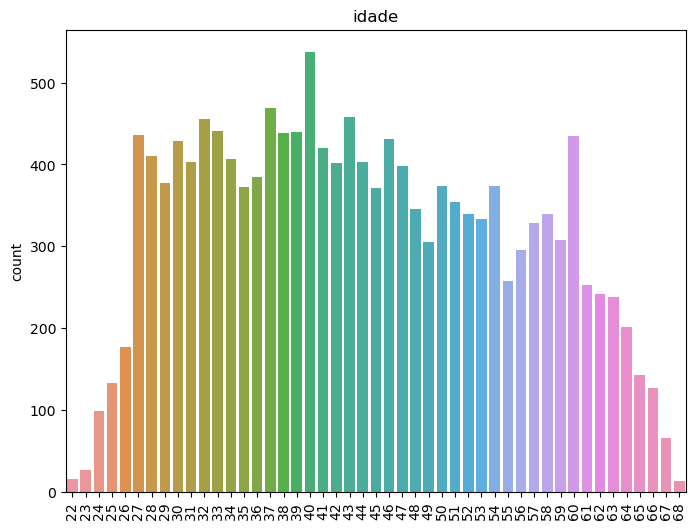

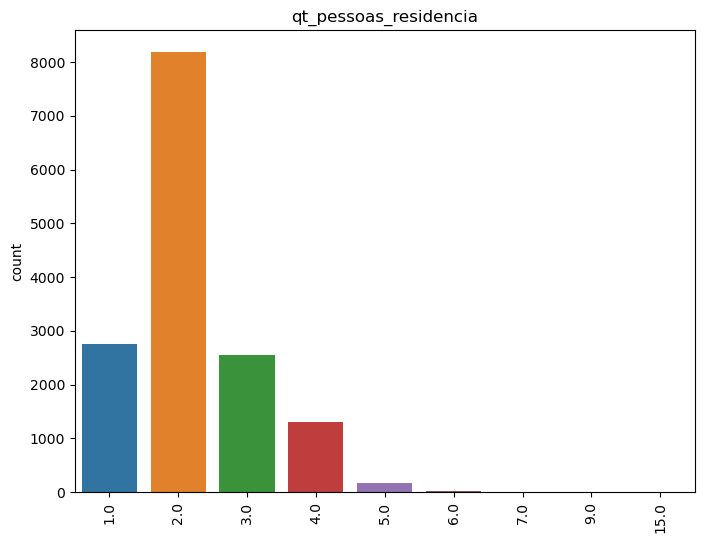

In [15]:
colunas = ['sexo',
           'posse_de_veiculo', 
           'posse_de_imovel', 
           'qtd_filhos', 
           'tipo_renda', 
           'educacao', 
           'estado_civil', 
           'tipo_residencia', 
           'idade',
           'qt_pessoas_residencia'
]

for coluna in colunas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=renda, x=coluna)
    plt.title(coluna)
    plt.xlabel(None)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


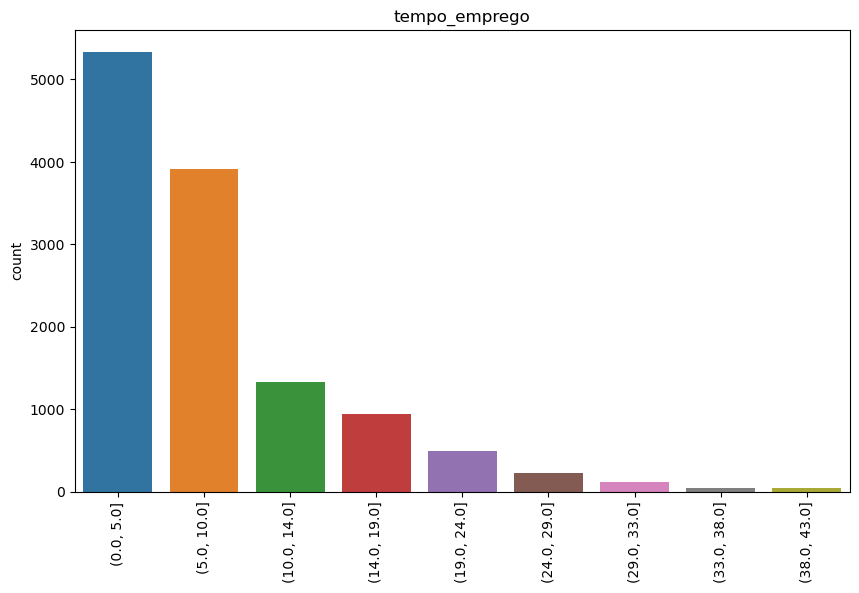

In [16]:
bins = np.round(np.linspace(min(renda['tempo_emprego']), max(renda['tempo_emprego']), 10))
plt.figure(figsize=(10, 6))
sns.countplot(data=renda, x=pd.cut(renda['tempo_emprego'], bins))
plt.title('tempo_emprego')
plt.xlabel(None)
plt.xticks(rotation=90)
plt.show()

### Entendimento dos dados - Bivariadas




#### 1) Avaliando a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Identificando algum padrão interessante ou que faça sentido.

In [21]:
renda_num = renda.select_dtypes(include=['number'])
renda_num

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,26,6.602740,1.0,8060.34
1,0,28,7.183562,2.0,1852.15
2,0,35,0.838356,2.0,2253.89
3,1,30,4.846575,3.0,6600.77
4,0,33,4.293151,1.0,6475.97
...,...,...,...,...,...
14995,0,48,13.887671,1.0,7990.58
14996,0,57,NaN,1.0,10093.45
14997,0,45,7.832877,2.0,604.82
14998,0,36,4.298630,2.0,3352.27


C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

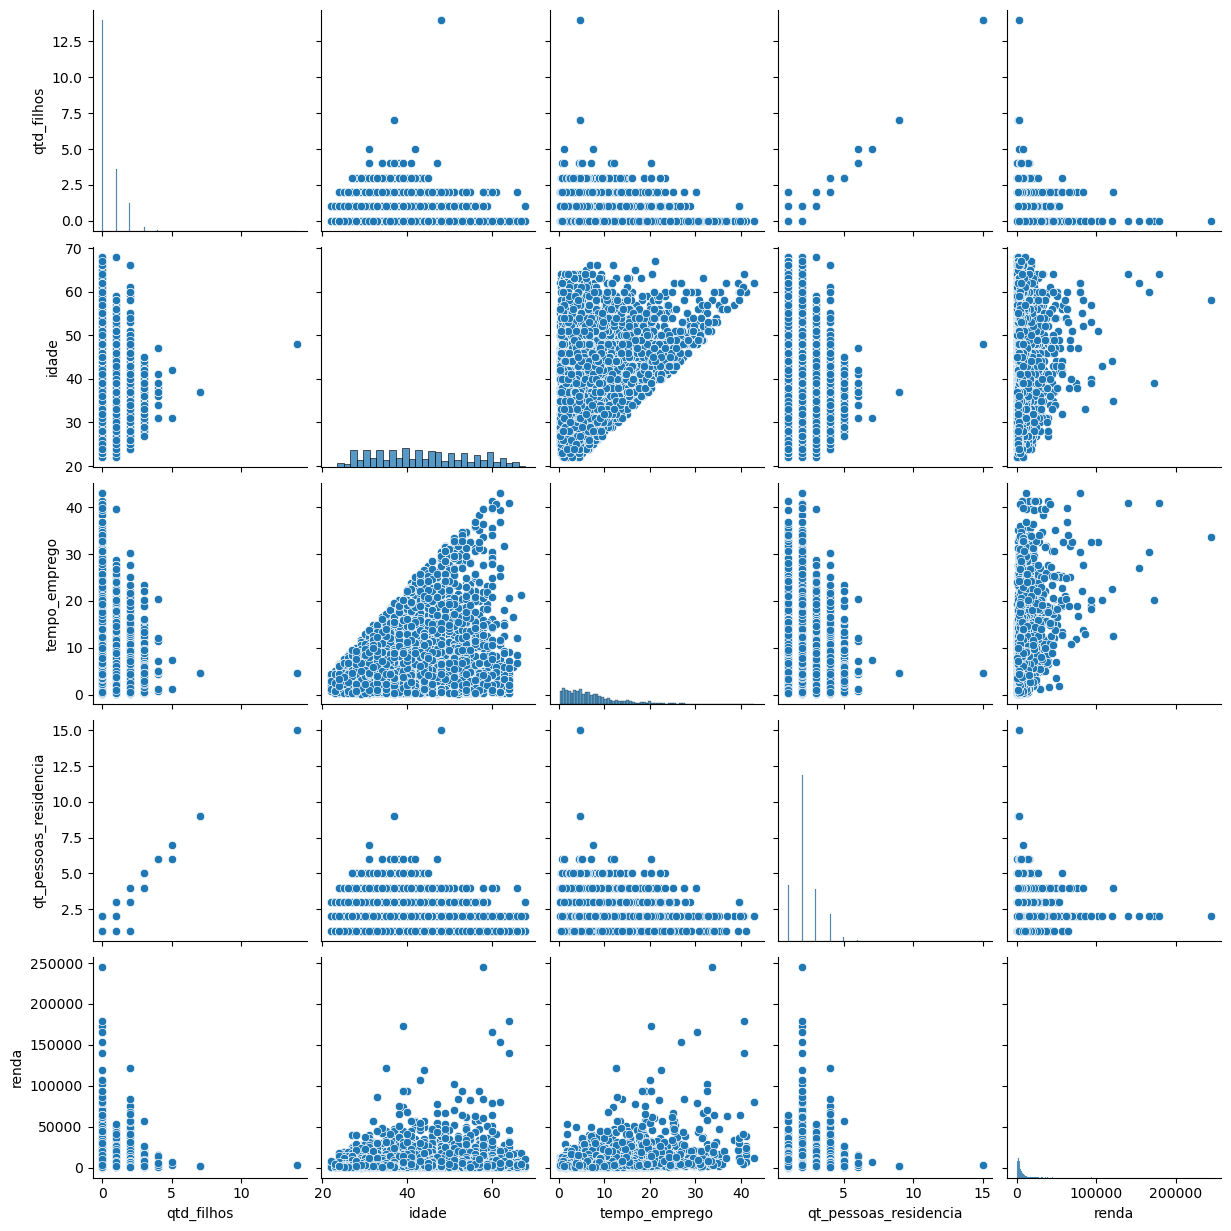

In [22]:
sns.pairplot(renda_num)

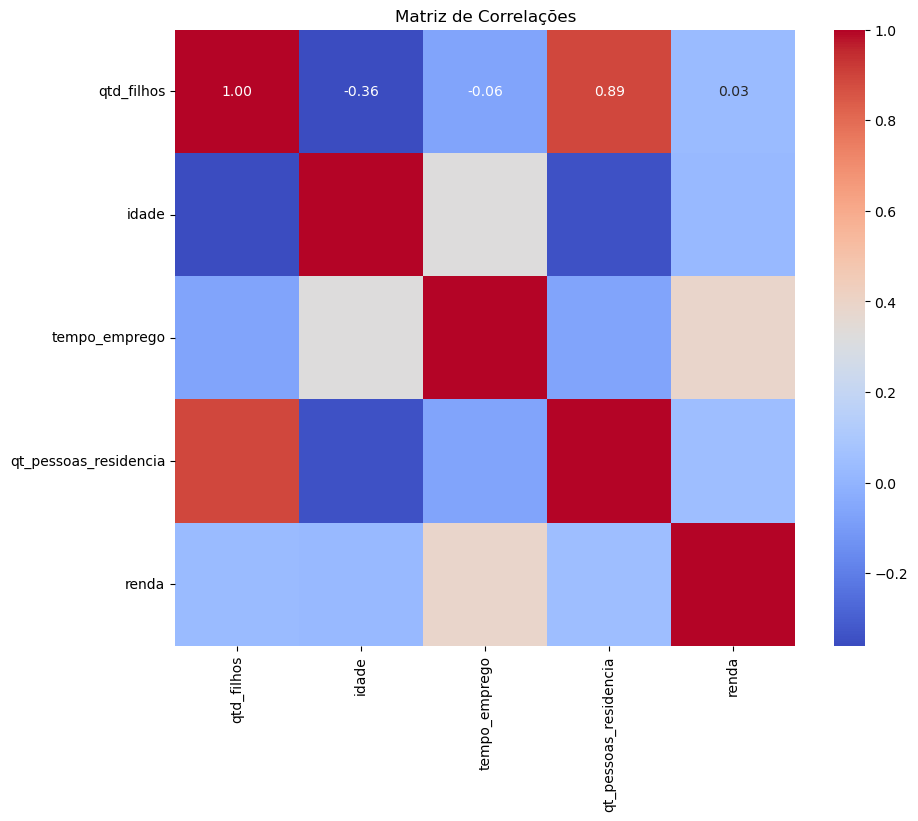

In [23]:
matriz = renda_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlações")
plt.show()

- Há uma correlação forte entre a quantidade de filhos e o número de pessoas na residência.
- O tempo de emprego apresenta uma boa correlação com a renda.
- Não há uma correlação forte entre a renda e a quantidade de filhos, idade ou número de pessoas por residência.
- A quantidade de pessoas na residência possui uma boa relação com a idade.
- A idade apresenta uma boa correlação com a quantidade de filhos.
- A maioria das pessoas com filhos está na faixa dos 30 anos.
- Casas com crianças tendem, naturalmente, a ter um maior número de habitantes.
- A renda não apresenta relação significativa com o tempo de emprego nem com a idade.

#### 2) Avaliando um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

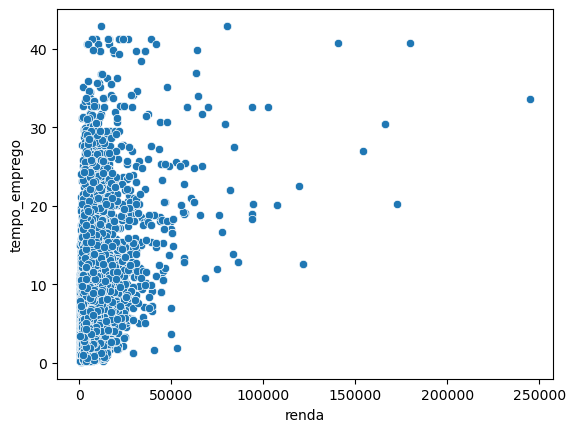

In [26]:
sns.scatterplot(renda_num, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

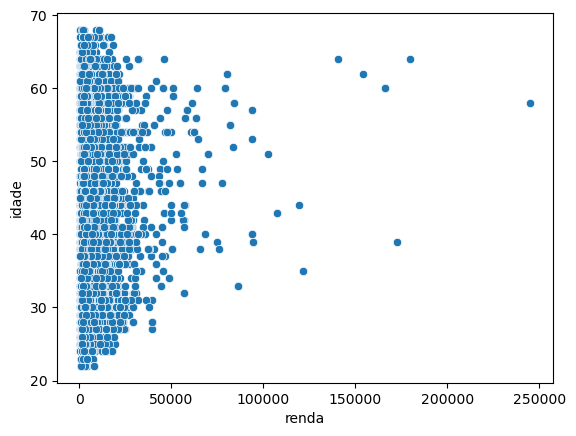

In [27]:
sns.scatterplot(renda_num, x='renda', y='idade')

In [28]:
renda['educacao_numerica'] = renda['educacao'].map({
    'Primário': 1,
    'Secundário': 2,
    'Superior incompleto': 3,
    'Superior completo': 4,
    'Pós graduação': 5
})

In [29]:
correlacao = renda['educacao_numerica'].corr(renda['renda'])
correlacao

0.031839896250551725

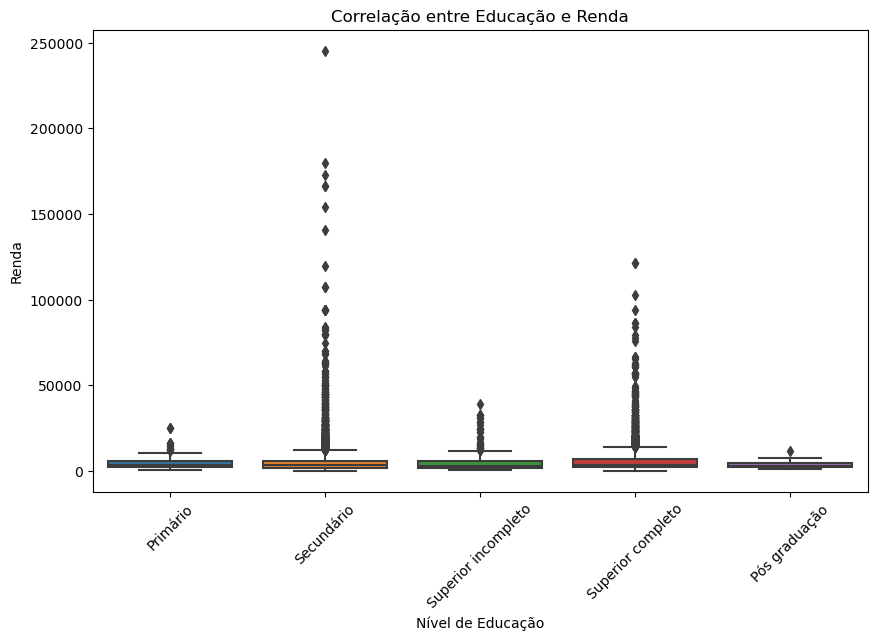

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='renda', data=renda, order=['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação'])
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.title('Correlação entre Educação e Renda')
plt.show()

- Após a análise dos dados e dos gráficos gerados, podemos confirmar que há outliers na variável renda.

#### 3) Calculando o logaritmo da variável renda e repetindo a sequência de análise

<Axes: xlabel='idade', ylabel='log_renda'>

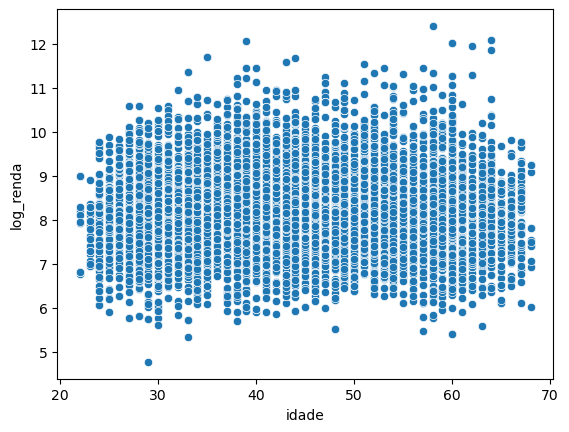

In [33]:
renda_log = renda.copy()
renda_log['log_renda'] = np.log(renda['renda'])

sns.scatterplot(x='idade', y='log_renda', data = renda_log)

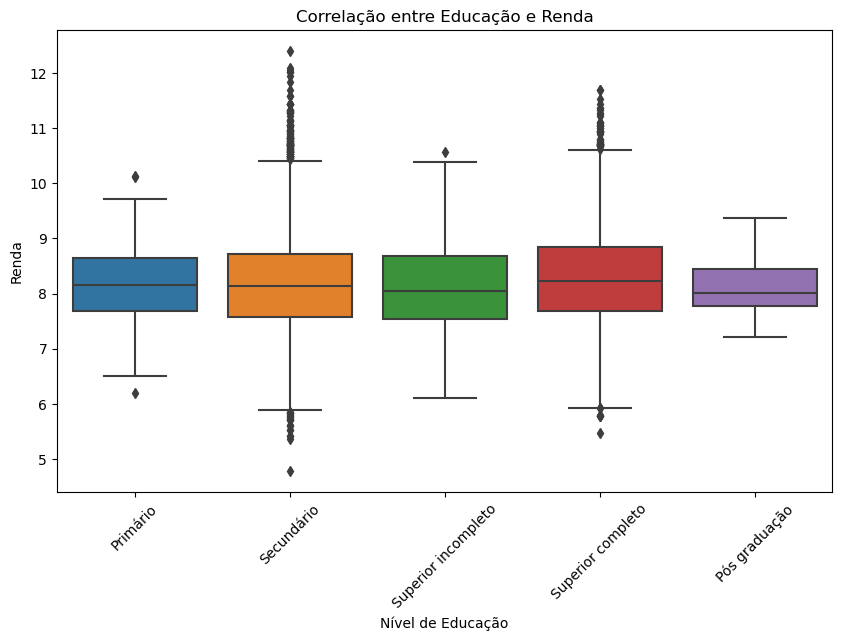

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='log_renda', data=renda_log, order=['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação'])
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.title('Correlação entre Educação e Renda')
plt.show()

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

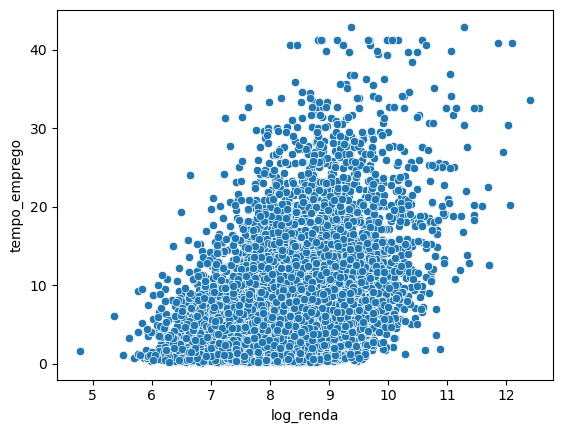

In [35]:
sns.scatterplot(renda_log, x='log_renda', y='tempo_emprego')

- A aplicação do logaritmo na variável de renda teve um efeito positivo, reduzindo a quantidade de outliers. No entanto, alguns ainda permanecem.

### Fazendo uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

C:\Users\gusta\AppData\Local\Temp\ipykernel_24092\3636175056.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.pointplot(x="posse_de_imovel", y="renda",


<Axes: xlabel='posse_de_imovel', ylabel='renda'>

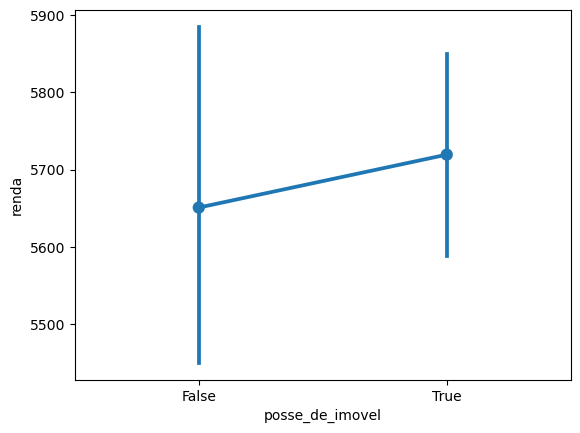

In [38]:
sns.pointplot(x="posse_de_imovel", y="renda", 
              data=renda, dodge=True, ci = 90)

- De acordo com o gráfico acima, quem possui imóvel tem a renda ligeiramente maior.

C:\Users\gusta\AppData\Local\Temp\ipykernel_24092\1021331556.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.pointplot(x="posse_de_veiculo", y="renda",


<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

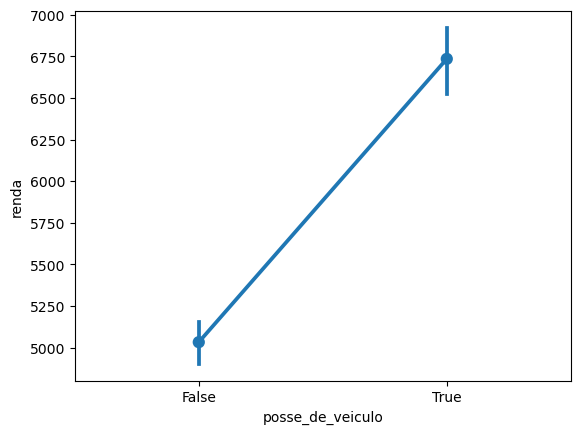

In [40]:
sns.pointplot(x="posse_de_veiculo", y="renda", 
              data=renda, dodge=True, ci = 90)

- De acordo com o gráfico acima, quem possui veículo tem a renda maior.

C:\Users\gusta\AppData\Local\Temp\ipykernel_24092\2356993965.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="posse_de_imovel", y="renda", hue = 'posse_de_veiculo',


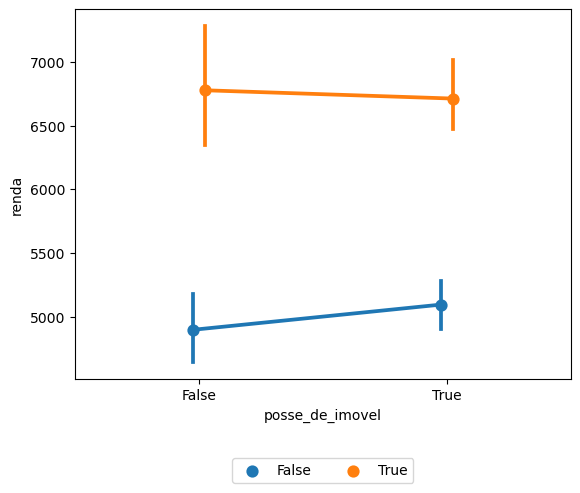

In [42]:
sns.pointplot(x="posse_de_imovel", y="renda", hue = 'posse_de_veiculo',
                   data=renda, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

- Quanto maior a renda, maior as chances do cliente possuir um imóvel ou veículo.

#### Construindo um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Houve alguma alteração importante a ser investigada?

In [45]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

In [46]:
renda['posse_de_veiculo'] = renda['posse_de_veiculo'].astype(str)

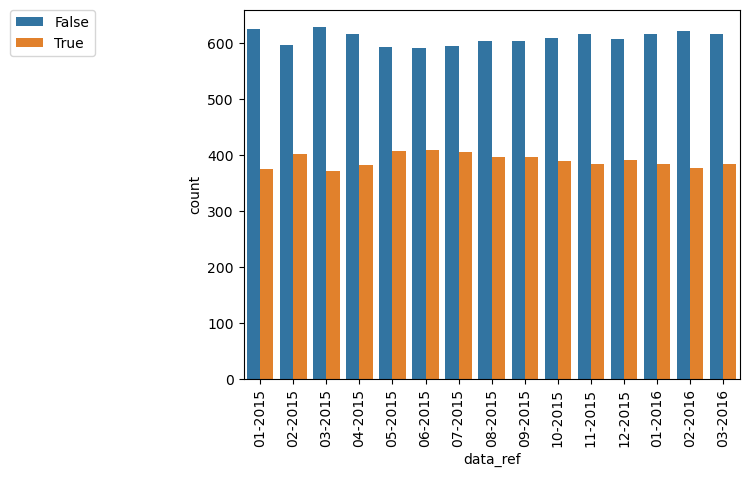

In [47]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=renda)

dados_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=90)

plt.legend(bbox_to_anchor=(-0.30, 1), loc=1, borderaxespad=0.)

In [48]:
renda['posse_de_imovel'] = renda['posse_de_imovel'].astype(str)

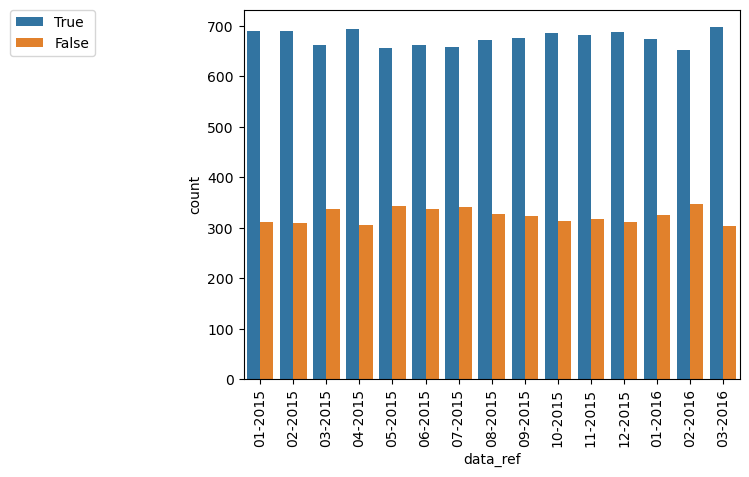

In [49]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=renda)

dados_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=90)

plt.legend(bbox_to_anchor=(-0.30, 1), loc=1, borderaxespad=0.)

Nos meses de agosto e outubro, observou-se um aumento no número de clientes com imóvel. Além disso, houve um leve crescimento no número de clientes sem carro em abril de 2015 e março de 2016.

#### Para cada variável qualitativa, construiu-se um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Pode utilizar essas variáveis em uma modelagem?

C:\Users\gusta\AppData\Local\Temp\ipykernel_24092\3364547081.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',


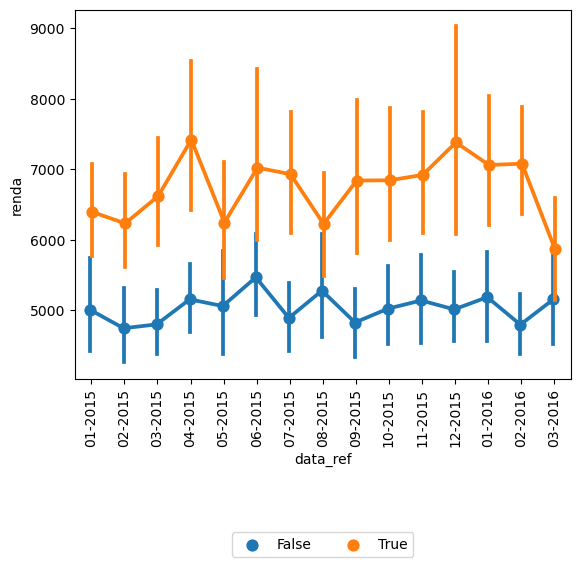

In [52]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=renda, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

C:\Users\gusta\AppData\Local\Temp\ipykernel_24092\325723908.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',


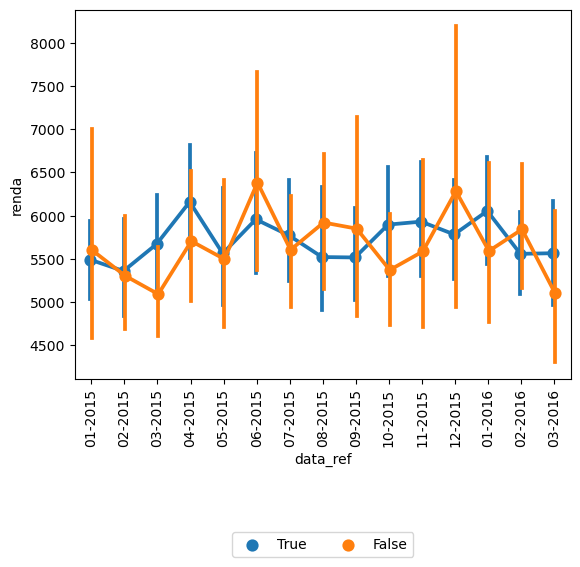

In [53]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=renda, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(1, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Houve uma variação significativa em 06/2015 e 12/2015, marcada pelo aumento na renda das pessoas com posse de veículo. Além disso, a partir de 12/2015, foi observada uma queda na renda das pessoas sem posse de imóvel. Quanto a renda das pessoas com posse de imóvel, ela teve oscilações ao longo do tempo, mas sempre se mantendo próximo de 5500 e 6000.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [57]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   sexo                   15000 non-null  object        
 2   posse_de_veiculo       15000 non-null  object        
 3   posse_de_imovel        15000 non-null  object        
 4   qtd_filhos             15000 non-null  int64         
 5   tipo_renda             15000 non-null  object        
 6   educacao               15000 non-null  object        
 7   estado_civil           15000 non-null  object        
 8   tipo_residencia        15000 non-null  object        
 9   idade                  15000 non-null  int64         
 10  tempo_emprego          12427 non-null  float64       
 11  qt_pessoas_residencia  15000 non-null  float64       
 12  renda                  15000 non-null  float64       
 13  e

In [58]:
print(renda.isna().sum())

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
educacao_numerica           0
dtype: int64


In [59]:
renda = renda.dropna()
print(renda.isna().sum())

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
educacao_numerica        0
dtype: int64


In [60]:
renda = renda.drop('data_ref', axis=1)

In [61]:
renda['posse_de_veiculo'] = renda['posse_de_veiculo'].astype(bool).astype(int)
renda['posse_de_imovel'] = renda['posse_de_imovel'].astype(bool).astype(int)

In [62]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  int32  
 2   posse_de_imovel        12427 non-null  int32  
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
 12  educacao_numerica      12427 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(5)
memory usage: 1.2+ MB


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### 1) Separando a base em treinamento e teste

In [65]:
X = pd.get_dummies(renda.drop(columns = 'renda'), drop_first = True)
y = renda['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 2) Rodando uma regularização *ridge*

In [67]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'

alpha_values = [0, 0.001, 0.005, 0.01, 0.05, 0.1]


for alpha in alpha_values:
    md = smf.ols(modelo, data=renda)
    
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=0.0000001, 
                             alpha=alpha)
    
    print(f"\n### Alpha = {alpha} ###")
    print(reg.summary())



### Alpha = 0 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:39   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12421   BIC:                         2.747e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])



### Alpha = 0.005 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     928.5
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:40   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12420   BIC:                         2.748e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])



### Alpha = 0.05 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     928.5
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:40   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12420   BIC:                         2.748e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


### 3) Rodando uma regularização *LASSO*

In [69]:
modelo = 'np.log(renda) ~ C(sexo, Treatment("F")) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego'

alpha_values = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for alpha in alpha_values:
    md = smf.ols(modelo, data=renda)
    
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=1, 
                             alpha=alpha)
    
    print(f"\n### Alpha = {alpha} ###")
    print(reg.summary())



### Alpha = 0 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:40   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12421   BIC:                         2.747e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])



### Alpha = 0.005 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:41   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])



### Alpha = 0.05 ###
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:41   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


### 4) Rodando um modelo *stepwise*

In [71]:
print(X.dtypes)
print(y.dtypes)

posse_de_veiculo                   int32
posse_de_imovel                    int32
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
educacao_numerica                  int64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_

In [72]:
X = X.astype(float)
y = y.astype(float)

In [73]:
print(X.dtypes)
print(y.dtypes)

posse_de_veiculo                 float64
posse_de_imovel                  float64
qtd_filhos                       float64
idade                            float64
tempo_emprego                    float64
qt_pessoas_residencia            float64
educacao_numerica                float64
sexo_M                           float64
tipo_renda_Bolsista              float64
tipo_renda_Empresário            float64
tipo_renda_Pensionista           float64
tipo_renda_Servidor público      float64
educacao_Pós graduação           float64
educacao_Secundário              float64
educacao_Superior completo       float64
educacao_Superior incompleto     float64
estado_civil_Separado            float64
estado_civil_Solteiro            float64
estado_civil_União               float64
estado_civil_Viúvo               float64
tipo_residencia_Casa             float64
tipo_residencia_Com os pais      float64
tipo_residencia_Comunitário      float64
tipo_residencia_Estúdio          float64
tipo_residencia_

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X_train, y_train)

print(variaveis)

Add  posse_de_imovel                with p-value 0.0
#############
['posse_de_imovel']
Add  posse_de_veiculo               with p-value 0.0
#############
['posse_de_imovel', 'posse_de_veiculo']
Add  tempo_emprego                  with p-value 0.0
#############
['posse_de_imovel', 'posse_de_veiculo', 'tempo_emprego']
Add  sexo_M                         with p-value 1.26513e-242
#############
['posse_de_imovel', 'posse_de_veiculo', 'tempo_emprego', 'sexo_M']
Add  tipo_renda_Empresário          with p-value 4.12304e-06
#############
['posse_de_imovel', 'posse_de_veiculo', 'tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add  idade                          with p-value 2.37794e-05
#############
['posse_de_imovel', 'posse_de_veiculo', 'tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade']
Add  educacao_Superior completo     with p-value 0.00080423
#############
['posse_de_imovel', 'posse_de_veiculo', 'tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'idade', 'educacao_Superior co

In [76]:
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,educacao_numerica
0,F,1,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,2
1,M,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,4
2,F,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,4
3,F,1,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,4
4,M,1,1,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,2


In [77]:
renda = pd.get_dummies(renda, drop_first=True)

In [78]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  int32  
 1   posse_de_imovel                12427 non-null  int32  
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   educacao_numerica              12427 non-null  int64  
 8   sexo_M                         12427 non-null  bool   
 9   tipo_renda_Bolsista            12427 non-null  bool   
 10  tipo_renda_Empresário          12427 non-null  bool   
 11  tipo_renda_Pensionista         12427 non-null  bool   
 12  tipo_renda_Servidor público    12427 non-null  bool

In [79]:
renda = renda.astype(float)

In [80]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   educacao_numerica              12427 non-null  float64
 8   sexo_M                         12427 non-null  float64
 9   tipo_renda_Bolsista            12427 non-null  float64
 10  tipo_renda_Empresário          12427 non-null  float64
 11  tipo_renda_Pensionista         12427 non-null  float64
 12  tipo_renda_Servidor público    12427 non-null  floa

In [81]:
novos_nomes = { 'tipo_renda_Servidor público' : 'tipo_renda_Servidor_público',
                'educacao_Pós graduação': 'educacao_Pós_graduação',
                'educacao_Superior completo' : 'educacao_Superior_completo',
                'educacao_Superior incompleto' : 'educacao_Superior_incompleto',
                'tipo_residencia_Com os pais' : 'tipo_residencia_com_pais'}
renda = renda.rename(columns= novos_nomes)
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   educacao_numerica              12427 non-null  float64
 8   sexo_M                         12427 non-null  float64
 9   tipo_renda_Bolsista            12427 non-null  float64
 10  tipo_renda_Empresário          12427 non-null  float64
 11  tipo_renda_Pensionista         12427 non-null  float64
 12  tipo_renda_Servidor_público    12427 non-null  floa

In [82]:
reg = smf.ols('renda ~ tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + posse_de_imovel', data = renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     849.3
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:42   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1324.8922    168.598     -7.858      0.000   -1655.370    -994.414
tempo_emprego                554.5462     10.938     50.698      0.000     533.105     575.987
sexo_M                      6103.2075    145.604     41.917      0.000    5817.801    6388.614
tipo_renda_Empresário        781.0046    154.422      5.058      0.000     478.314    1083.695
idade                         43.9631      7.827      5.617      0.000      28.621      59.306
educacao_Superior_completo   667.7642    143.048      4.668      0.000     387.368     948.161
posse_de_imovel            -1324.8922    168.598     -7.858      0.000   -1655.370    -994.414
==============================================================================
Omnibus:                    17559.401   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9846251.571
Skew:                           8.117   Prob(JB):                         0.00
Kurtosis:                     139.939   Cond. No.                     3.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 5) Utilizando o log da renda

In [86]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo_M + tipo_renda_Empresário + idade + educacao_Superior_completo + posse_de_imovel', data = renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1354.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:23:42   Log-Likelihood:                -13613.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12421   BIC:                         2.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.5962      0.016    226.208      0.000       3.565       3.627
tempo_emprego                  0.0617      0.001     59.861      0.000       0.060       0.064
sexo_M                         0.7993      0.014     58.220      0.000       0.772       0.826
tipo_renda_Empresário          0.1437      0.015      9.866      0.000       0.115       0.172
idade                          0.0054      0.001      7.351      0.000       0.004       0.007
educacao_Superior_completo     0.1188      0.013      8.808      0.000       0.092       0.145
posse_de_imovel                3.5962      0.016    226.208      0.000       3.565       3.627
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.461
Skew:                           0.015   Prob(JB):                        0.794
Kurtosis:                       3.007   Cond. No.                     3.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 6) Ajustando uma árvore de regressão

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
arvore = DecisionTreeRegressor(max_depth=5)

arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [90]:
previsoes = arvore.predict(X_test)
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)
print(mse)
print(r2)

36280927.086003944
0.3592847293566558


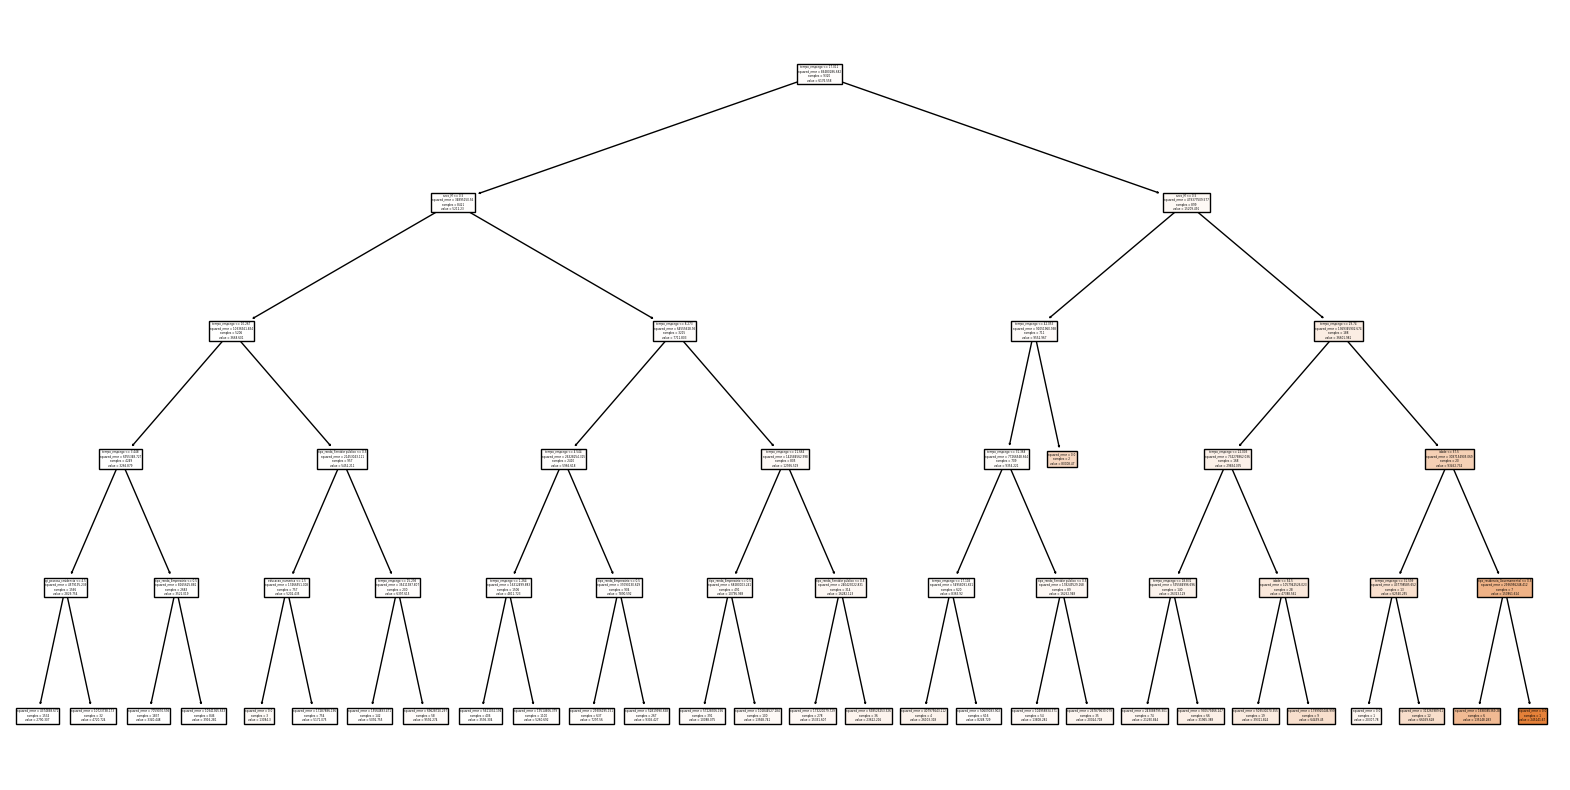

In [91]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(arvore,
                    feature_names=X.columns,
                    filled=True)

## Etapa 5 Crisp-DM: Avaliação dos resultados


- Quando olhamos os modelos regularizados utilizando o método ridge, temos os valores de r-quadrado iguais para todos os alphas.
- O melhor modelo utilizando o método *LASSO* foi o com o alpha = 0. Obtendo um r-quadrado maior.
- Já no modelo *stepwise*, o r-quadrado encontrado foi menor do que os dos outros modelos feitos.
- Tanto a regularização *ridge* como a regularização *LASSO* (com alpha = 0) obteram o mesmo r-quadrado.
- Utilizando o log na renda, podemos obter um valor de r-quadrado superior ao modelo anterior.
- Quando testado uma árvore de regressão, o r-quadrado encontrado na árvore foi menor do que o dos outros modelos.
- O melhor modelo foi a árvore de regressão, obtendo um r-quadrado de 35,9%.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação. Neste caso, será utilizada a implantação através de uma página do streamlit